## **What is Natural language processing ??**
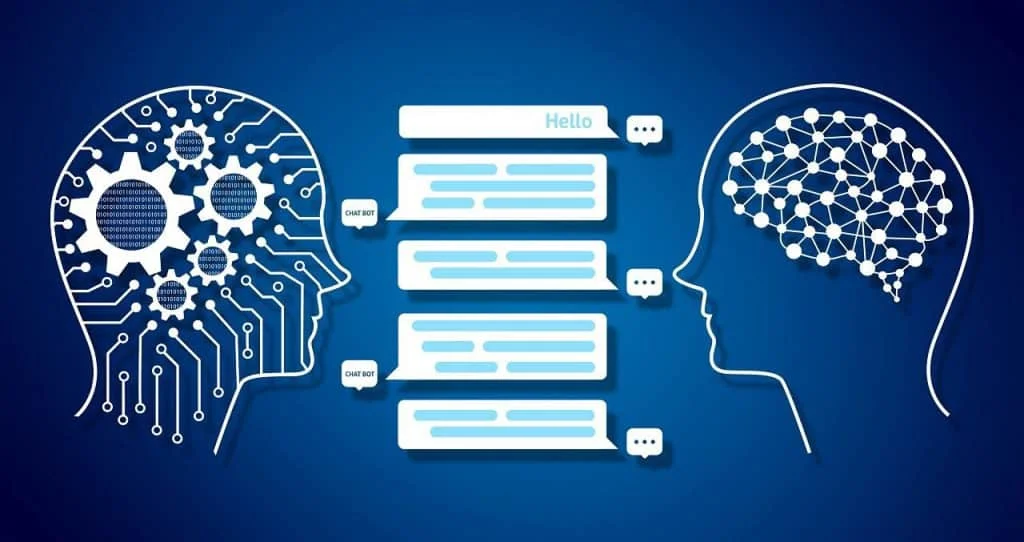

Natural Language Processing or NLP is a field of Artificial Intelligence that gives the machines the ability to read, understand and derive meaning from human languages.

## Spacy 

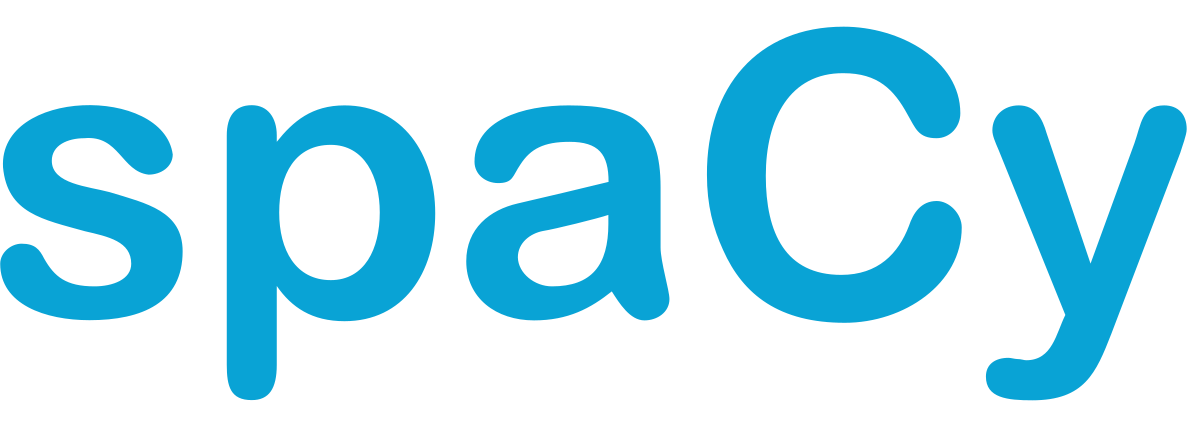

**spaCy** is an open-source software library for advanced natural language 
processing


`spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.`

## Installation 

follow the guide - https://spacy.io/usage

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm  # default trained pipeline

## Doc object

A Doc is a sequence of Token objects

We can get the **doc** object via a **nlp** object

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Welcome to my youtube channel")

In [3]:
for token in doc:
  print(token)

Welcome
to
my
youtube
channel


#### This is called **Tokenization**.

## Part of speech Tagging 

In [4]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.shape_, token.is_alpha, token.is_stop)

Welcome welcome VERB VBP ROOT Xxxxx True False
to to ADP IN prep xx True True
my my PRON PRP$ poss xx True True
youtube youtube NOUN NN compound xxxx True False
channel channel NOUN NN pobj xxxx True False


## Lemmatization 


In [5]:
doc = nlp("I was watching youtube video.")
print([token.lemma_ for token in doc])

['I', 'be', 'watch', 'youtube', 'video', '.']


## Morphological features

In [6]:
doc = nlp("I was doing spacy project")
token = doc[0]  # 'I'
print(token.morph)  # 'Case=Nom|Number=Sing|Person=1|PronType=Prs'

Case=Nom|Number=Sing|Person=1|PronType=Prs


## Named Entity Recognition


In [7]:
doc=nlp("India is one of the oldest civilizations in the world with a kaleidoscopic variety and rich cultural heritage. It has achieved all-round socio-economic progress since Independence. As the 7th largest country in the world, India stands apart from the rest of Asia, marked off as it is by mountains and the sea, which give the country a distinct geographical entity. Bounded by the Great Himalayas in the north, it stretches southwards and at the Tropic of Cancer, tapers off into the Indian Ocean between the Bay of Bengal on the east and the Arabian Sea on the west.")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

India 0 5 GPE
Independence 167 179 GPE
7th 188 191 ORDINAL
India 222 227 GPE
Asia 258 262 LOC
the Great Himalayas 376 395 ORG
the Tropic of Cancer 441 461 EVENT
the Indian Ocean 479 495 LOC
the Bay of Bengal 504 521 LOC
the Arabian Sea 538 553 LOC


In [8]:
from spacy import displacy
displacy.render(doc, style='ent',jupyter=True)
#displacy.serve(doc,style='ent') => if using script

## adding new entity 

In [9]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
doc=nlp("India is one of the oldest civilizations in the world with a kaleidoscopic variety and rich cultural heritage. It has achieved all-round socio-economic progress since Independence. As the 7th largest country in the world, India stands apart from the rest of Asia, marked off as it is by mountains and the sea, which give the country a distinct geographical entity. Bounded by the Great Himalayas in the north, it stretches southwards and at the Tropic of Cancer, tapers off into the Indian Ocean between the Bay of Bengal on the east and the Arabian Sea on the west.")
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print('Before', ents)

Before [('India', 0, 5, 'GPE'), ('Independence', 167, 179, 'GPE'), ('7th', 188, 191, 'ORDINAL'), ('India', 222, 227, 'GPE'), ('Asia', 258, 262, 'LOC'), ('the Great Himalayas', 376, 395, 'ORG'), ('the Tropic of Cancer', 441, 461, 'EVENT'), ('the Indian Ocean', 479, 495, 'LOC'), ('the Bay of Bengal', 504, 521, 'LOC'), ('the Arabian Sea', 538, 553, 'LOC')]


In [10]:
new_ent = Span(doc, 2, 3, label="NUMBER")
orig_ents = list(doc.ents)
doc.ents = orig_ents + [new_ent]
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print('Before', ents)

Before [('India', 0, 5, 'GPE'), ('one', 9, 12, 'NUMBER'), ('Independence', 167, 179, 'GPE'), ('7th', 188, 191, 'ORDINAL'), ('India', 222, 227, 'GPE'), ('Asia', 258, 262, 'LOC'), ('the Great Himalayas', 376, 395, 'ORG'), ('the Tropic of Cancer', 441, 461, 'EVENT'), ('the Indian Ocean', 479, 495, 'LOC'), ('the Bay of Bengal', 504, 521, 'LOC'), ('the Arabian Sea', 538, 553, 'LOC')]


### Adding special case tokenisation Rules 


In [11]:
import spacy
from spacy.symbols import ORTH

nlp = spacy.load("en_core_web_sm")
doc = nlp("Newyork")  
print([w.text for w in doc]) 

# # Add special case rule
special_case = [{ORTH: "New"}, {ORTH: "york"}]
nlp.tokenizer.add_special_case("Newyork", special_case)

# # Check new tokenization
print([w.text for w in nlp("Newyork")])

['Newyork']
['New', 'york']
